In [2]:
import pandas as pd
import numpy as np
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Conv1D
from keras.layers import MaxPool1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras import optimizers
from math import sqrt
from keras.utils import to_categorical
import seaborn as sns
import keras
from keras.callbacks import ModelCheckpoint
from keras_adabound import AdaBound
from mlxtend.plotting import plot_confusion_matrix
import matplotlib


In [6]:
# df=pd.read_csv('./fdf.csv')
# df = df.drop(df.columns[0], axis=1)

In [3]:
df=pd.read_csv('./fdf-embedd.csv')
df = df.drop(df.columns[0], axis=1)
df=df.fillna(-1)
df["nDate"]=pd.to_datetime(df.date,format='%Y-%m-%d')

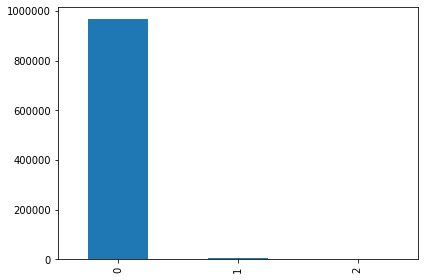

In [4]:
pd.value_counts(df['clicks_level']).plot.bar()
plt.tight_layout()

## Outliers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


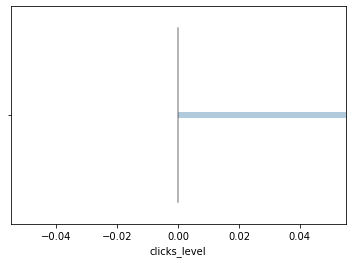

In [8]:
sns.boxenplot(x=df['clicks_level'])

In [9]:
df.head()

,date,query,tomorrow_net_clicks,bot_clicks_feature,bcfeature1,bcfeature2,bcfeature3,bcfeature4,cfeature4,ifeature4,...,roll_i_feature3_all,roll_i_feature7_all,roll_i_feature30_all,roll_p_feature2_all,roll_p_feature3_all,roll_p_feature7_all,roll_p_feature30_all,Mean,Median,nDate
0,2019-06-21,?????,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.014119,0.003428,2019-06-21
1,2019-06-21,' mattress store,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.010589,0.006418,2019-06-21
2,2019-06-21,#1 rated mattress,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.010928,0.000463,2019-06-21
3,2019-06-21,10 best mattresses,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.011061,0.001539,2019-06-21
4,2019-06-21,100 cotton percale sheets queen,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.010018,0.005830,2019-06-21


In [10]:
# df[df.pfeature4==-1]=
df.loc[df['clicks_level']==1, 'clicks_level'] = 2

In [11]:
df['clicks_level'].unique()

array([0, 2])

In [7]:
# gb.get_group(1).sample(50000,replace=True)

In [4]:
gb=df.groupby('clicks_level')
# newdf=pd.concat([y.sample(50000,replce=True) for y in gb.get_group(1)])
df=pd.concat([df,gb.get_group(1).sample(800000,replace=True),gb.get_group(2).sample(800000,replace=True)])
df=df.sort_values(['date'])

In [12]:
gb=df.groupby('clicks_level')
# newdf=pd.concat([y.sample(50000,replce=True) for y in gb.get_group(1)])
df=pd.concat([df,gb.get_group(2).sample(800000,replace=True)])
df=df.sort_values(['date'])

In [6]:
df[df["nDate"]<='2019-09-15']
# df.head()
# df
# pd.value_counts(train['clicks_level']).plot.bar()

,date,query,tomorrow_net_clicks,bot_clicks_feature,bcfeature1,bcfeature2,bcfeature3,bcfeature4,cfeature4,ifeature4,...,roll_i_feature3_all,roll_i_feature7_all,roll_i_feature30_all,roll_p_feature2_all,roll_p_feature3_all,roll_p_feature7_all,roll_p_feature30_all,Mean,Median,nDate
0,2019-06-21,?????,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.014119,0.003428,2019-06-21
4899,2019-06-21,mattresses store,1,1,1,0,0,0,0,2,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.011150,0.010450,2019-06-21
10083,2019-06-21,where can i try a saatva mattress,1,1,0,0,0,0,0,4,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.010423,0.002921,2019-06-21
7588,2019-06-21,serta glenmoor king,1,0,0,0,0,0,0,9,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.009849,0.001590,2019-06-21
7584,2019-06-21,serta glenmoor 2.0 medium,1,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.011713,0.008468,2019-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878714,2019-09-15,serta perfect sleeper elite glenmoor 2.0 hybrid,0,0,0,0,0,0,0,0,...,9356.000000,9417.285714,8046.000000,19.206356,22.135498,22.474883,28.350109,-0.012448,0.001098,2019-09-15
878605,2019-09-15,serta glenmoor 2.0,1,0,0,0,0,0,1,10,...,9356.000000,9417.285714,8046.000000,19.206356,22.135498,22.474883,28.350109,-0.012192,0.004764,2019-09-15
876726,2019-09-15,metta bed,2,0,0,0,0,0,2,13,...,9356.000000,9417.285714,8046.000000,19.206356,22.135498,22.474883,28.350109,-0.010375,0.004586,2019-09-15
873572,2019-09-15,best places to buy mattresses,3,0,0,0,0,0,0,10,...,9356.000000,9417.285714,8046.000000,19.206356,22.135498,22.474883,28.350109,-0.011806,-0.003201,2019-09-15


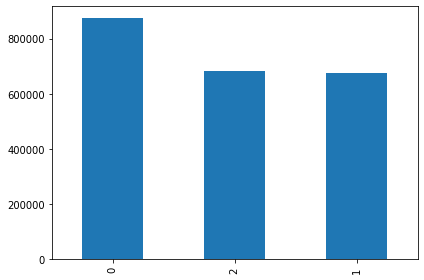

In [5]:
pd.value_counts(df[df["nDate"]<='2019-09-15']['clicks_level']).plot.bar()
plt.tight_layout()

In [7]:
df["date"]=df.date.astype(str)
df["Year"]=df.date.str[:4]
df["Month"]=df.date.str[5:7]
df["Day"]=df.date.str[8:]


df["Year"]=df.Year.astype(int)
df["Month"]=df.Month.astype(int)
df["Day"]=df.Day.astype(int)

labels=df["clicks_level"]
df=df.drop(['nDate','query','date','clicks_level','tomorrow_net_clicks'],axis=1)


# Scaling Values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)
# train=df[df["nDate"]<'2019-09-15']
# Y_train=train["clicks_level"]
# X_train=train.drop(['nDate','query','date','clicks_level','tomorrow_net_clicks'],axis=1)

# test=df[df["nDate"]>='2019-09-15']
# Y_test=test["clicks_level"]
# X_test=test.drop(['nDate','query','date','clicks_level','tomorrow_net_clicks'],axis=1)

In [4]:
# df["date"]=df.date.astype(str)
# df["Year"]=df.date.str[:4]
# df["Month"]=df.date.str[5:7]
# df["Day"]=df.date.str[8:]


# df["Year"]=df.Year.astype(int)
# df["Month"]=df.Month.astype(int)
# df["Day"]=df.Day.astype(int)





# train=df[df["nDate"]<='2019-09-15']


# gb=train.groupby('clicks_level')
# # newdf=pd.concat([y.sample(50000,replace=True) for y in gb.get_group(1)])
# train=pd.concat([train,gb.get_group(1).sample(800000,replace=True),gb.get_group(2).sample(800000,replace=True)])
# train=train.sort_values(['date'])



# test=df[df["nDate"]>'2019-09-15']


# gb=test.groupby('clicks_level')
# # newdf=pd.concat([y.sample(50000,replace=True) for y in gb.get_group(1)])
# test=pd.concat([test,gb.get_group(1).sample(80000,replace=True),gb.get_group(2).sample(80000,replace=True)])
# test=test.sort_values(['date'])






# train_y=train["clicks_level"].values
# train_X=train.drop(['nDate','query','date','clicks_level','tomorrow_net_clicks'],axis=1).values


# test_y=test["clicks_level"].values
# test_X=test.drop(['nDate','query','date','clicks_level','tomorrow_net_clicks'],axis=1).values



# train_y = to_categorical(train_y)
# test_y=to_categorical(test_y)


# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2480874, 1, 65) (2480874, 3) (253828, 1, 65) (253828, 3)


In [8]:
# split into train and test sets
values = scaled
# values=df.values
y=labels.copy()
# n_train_hours = 872663
# n_train_hours= 2197001
n_train_hours=2232160
train_X ,train_y= values[:n_train_hours, :],y[:n_train_hours]
test_X,test_y = values[n_train_hours:, :],y[n_train_hours:]



train_y = to_categorical(train_y)
test_y=to_categorical(test_y)


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2232160, 1, 65) (2232160, 3) (342542, 1, 65) (342542, 3)


In [10]:
# df.iloc[0:872663,:]
# df[df["nDate"]>='2019-09-15']
# df.iloc[872663:,:]

In [11]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)

In [12]:
# # reshape input to be 3D [samples, timesteps, features]
# train_X=X_train.values
# test_X=X_test.values

# train_y=Y_train.values
# test_y=Y_test.values


# train_y = to_categorical(train_y)
# test_y=to_categorical(test_y)



# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [9]:
model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=5,kernel_size=3,activation='relu'),batch_input_shape=(1,3,16,5)))
# model.add(TimeDistributed(Flatten()))
# model.add(LSTM(50,dropout=(0.4)))
# model.add(Dense(3, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])



model.add(LSTM(50,activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(3, activation='softmax'))
opt=keras.optimizers.Adam(learning_rate=0.005,amsgrad=True)


# opt = AdaBound(lr=1e-03,final_lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])


# checkpoint
# filepath="./models/weights-2Class-improvement-{epoch:02d}-{val_categorical_accuracy:.3f}.hdf5"
filepath='./models/weight-best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# fit network
history = model.fit(train_X, train_y, epochs=5, batch_size=256,callbacks=callbacks_list,validation_data=(test_X, test_y),shuffle=False)


Train on 2232160 samples, validate on 342542 samples
Epoch 1/5
2232160/2232160 [==============================] - 42s 19us/step - loss: 0.6688 - categorical_accuracy: 0.6972 - val_loss: 0.7404 - val_categorical_accuracy: 0.7121

Epoch 00001: val_categorical_accuracy improved from -inf to 0.71210, saving model to ./models/weight-best.hdf5
Epoch 2/5
2232160/2232160 [==============================] - 42s 19us/step - loss: 0.5687 - categorical_accuracy: 0.7413 - val_loss: 0.6942 - val_categorical_accuracy: 0.7304

Epoch 00002: val_categorical_accuracy improved from 0.71210 to 0.73035, saving model to ./models/weight-best.hdf5
Epoch 3/5
2232160/2232160 [==============================] - 41s 18us/step - loss: 0.5472 - categorical_accuracy: 0.7528 - val_loss: 0.6830 - val_categorical_accuracy: 0.7223

Epoch 00003: val_categorical_accuracy did not improve from 0.73035
Epoch 4/5
2232160/2232160 [==============================] - 42s 19us/step - loss: 0.5376 - categorical_accuracy: 0.7566 - val

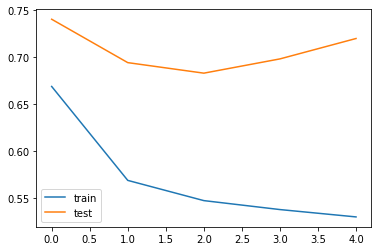

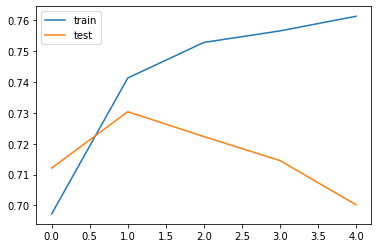

In [10]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


# plot history
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

In [19]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(3, activation='softmax'))
model.load_weights('./weights-embedding-improvement-08-0.707.hdf5')

In [15]:
ypred=model.predict(test_X)

In [16]:
ypred=np.argmax(ypred,axis=1)
test_y=np.argmax(test_y,axis=1)

In [17]:
print (sklearn.metrics.f1_score(test_y,ypred,average='macro'))
print (sklearn.metrics.accuracy_score(test_y,ypred))

0.47028125081894673
0.9264718420940444


In [14]:
df=pd.read_csv('./fdf-embedd.csv')
df = df.drop(df.columns[0], axis=1)
df=df.fillna(-1)
df["nDate"]=pd.to_datetime(df.date,format='%Y-%m-%d')


# df.loc[df['clicks_level']==1, 'clicks_level'] = 2
# df.loc[df['pfeature4']==-1, 'pfeature4'] = 0 


df=df[df["nDate"]>'2019-09-15']
df["date"]=df.date.astype(str)
df["Year"]=df.date.str[:4]
df["Month"]=df.date.str[5:7]
df["Day"]=df.date.str[8:]


df["Year"]=df.Year.astype(int)
df["Month"]=df.Month.astype(int)
df["Day"]=df.Day.astype(int)


labels=df["clicks_level"]
df=df.drop(['nDate','query','date','clicks_level','tomorrow_net_clicks'],axis=1)


scaled = scaler.transform(df.values)


values = scaled
# values=df.values
y=labels
# n_train_hours = 872663
# n_train_hours= 2197001
# n_train_hours=1865707
# train_X ,train_y= values[:n_train_hours, :],y[:n_train_hours]


test_X = values
test_y=y
# train_y = to_categorical(train_y)
test_y=to_categorical(test_y)


# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(test_X.shape, test_y.shape)

(93828, 1, 65) (93828, 3)


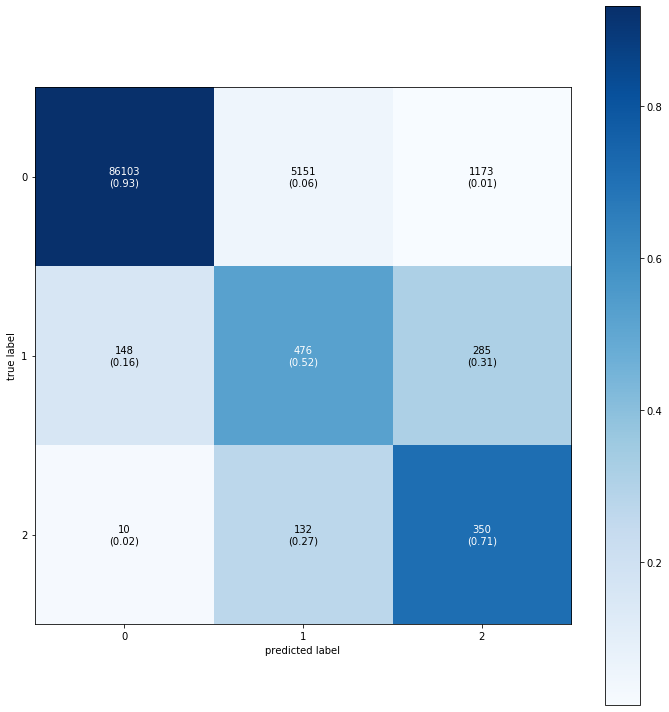

In [19]:
conf=sklearn.metrics.confusion_matrix(test_y,ypred,labels=[0,1,2])
fig, ax = plot_confusion_matrix(conf_mat=conf,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))



# labels=['','0','2']
# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels)
# fig.suptitle('LSTM 2 Classes')
plt.tight_layout()
plt.savefig('lstm-3classes-clickslevel.png')
plt.show()

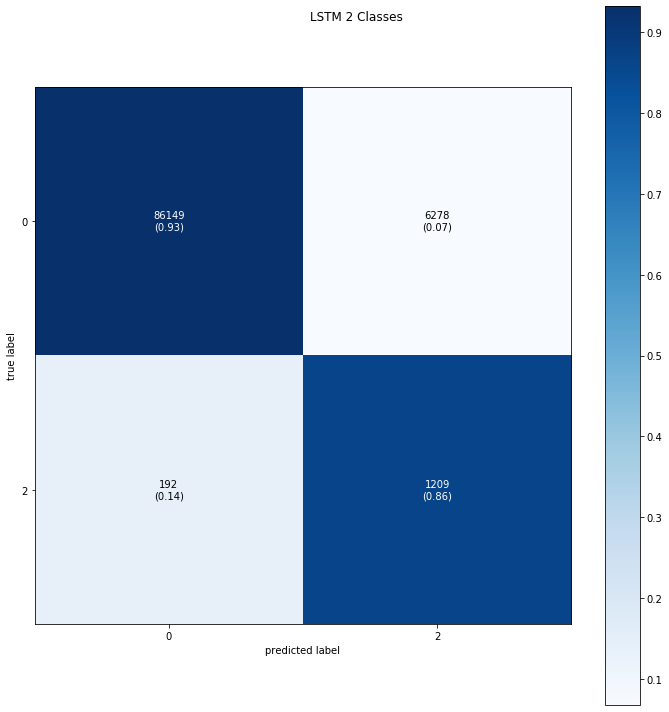

In [128]:
conf=sklearn.metrics.confusion_matrix(test_y,ypred,labels=[0,2])
fig, ax = plot_confusion_matrix(conf_mat=conf,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))



labels=['','0','2']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
fig.suptitle('LSTM 2 Classes')
plt.tight_layout()
# plt.savefig('lstm-2classes-clickslevel.png')
plt.show()

array([[9.32076125e+01, 4.48108494e+02],
       [2.07731507e-01, 8.62955032e+01]])